<xarray.DataArray 'time' (time: 49)> Size: 392B
array(['2022-07-16T00:00:00.000000000', '2022-07-16T01:00:00.000000000',
       '2022-07-16T02:00:00.000000000', '2022-07-16T03:00:00.000000000',
       '2022-07-16T04:00:00.000000000', '2022-07-16T05:00:00.000000000',
       '2022-07-16T06:00:00.000000000', '2022-07-16T07:00:00.000000000',
       '2022-07-16T08:00:00.000000000', '2022-07-16T09:00:00.000000000',
       '2022-07-16T10:00:00.000000000', '2022-07-16T11:00:00.000000000',
       '2022-07-16T12:00:00.000000000', '2022-07-16T13:00:00.000000000',
       '2022-07-16T14:00:00.000000000', '2022-07-16T15:00:00.000000000',
       '2022-07-16T16:00:00.000000000', '2022-07-16T17:00:00.000000000',
       '2022-07-16T18:00:00.000000000', '2022-07-16T19:00:00.000000000',
       '2022-07-16T20:00:00.000000000', '2022-07-16T21:00:00.000000000',
       '2022-07-16T22:00:00.000000000', '2022-07-16T23:00:00.000000000',
       '2022-07-17T00:00:00.000000000', '2022-07-17T01:00:00.000000000',
   

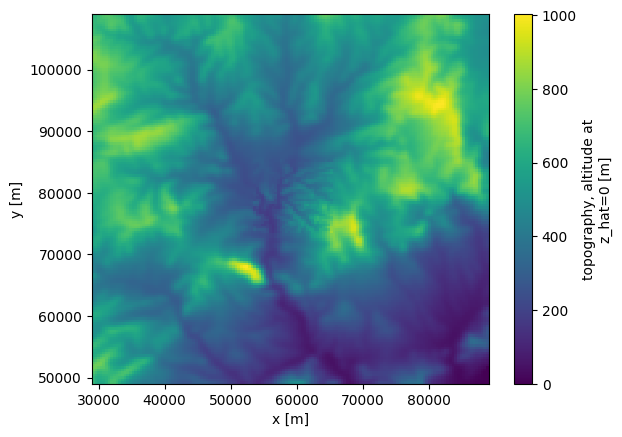

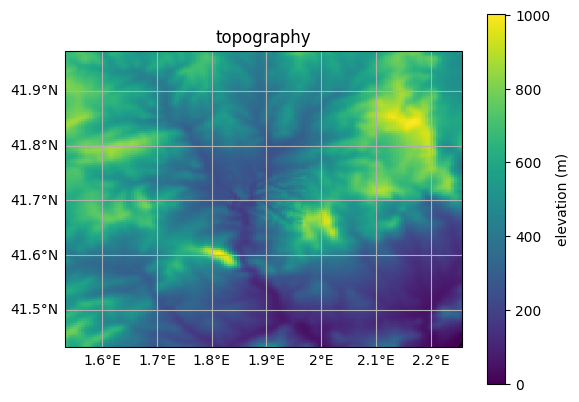

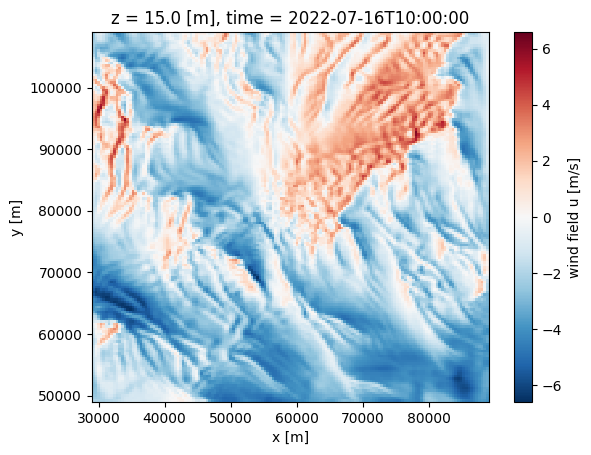

In [2]:
#import library
import xarray as xr
import netCDF4
import cartopy
import cftime
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import pyproj
fileinput = '/data/IMFSE/PythonCourse/MNH/FCAST_model2.nc'
ds = xr.open_dataset(fileinput, decode_times=False)

# Extract the time variable
time_var = ds["time"]

# Get the time units, and remove the non-standard prefix
units = time_var.attrs['units'].replace('fire ignition: ', '')

# Convert the time variable using cftime
times = cftime.num2date(time_var.values, units=units, calendar='standard')

# Convert to pandas datetime if needed
times_as_datetime = [datetime(year=t.year, month=t.month, day=t.day, 
                              hour=t.hour, minute=t.minute, second=t.second,microsecond=t.microsecond)
                     for t in times]


# Replace the time variable in the dataset with the converted times
ds["time"] = ("time", times_as_datetime)

# Print the dataset to check the time conversion
print(ds["time"])
ds['topography'].plot()

crs_here = ccrs.PlateCarree() 

fig, ax = plt.subplots(subplot_kw={'projection': crs_here})

# Add borders, coastlines and gridlines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
gl = ax.gridlines(draw_labels=True)

# Disable labels on the right and top sides
gl.right_labels = False
gl.top_labels = False

# Plot data using pcolormesh
colm = ax.pcolormesh(ds.lon, ds.lat, ds.topography, cmap='viridis', shading='auto', transform=crs_here)

# Add a colorbar
plt.colorbar(colm, ax=ax, orientation='vertical', label='elevation (m)')

# Set title
plt.title('topography')

plt.show()

ds['u'][10,0,:,:].plot()